In [5]:
#Data set NBA

import pandas as pd

url ='C:\Users\fabio_zph9j2v\OneDrive\Documentos\Coderhouse\data-science\\NBASeasonData.csv'
dfNBA = pd.read_csv(url)
dfNBA.head()

,Year,Tm,Player,Age,G,MP,PER,TS%,3PAr,FTr,...,D-WORP,Adjusted WORP,Estimated Position,BBRef Pos,Age on Feb 1,Yrs Experience,Height,Weight,Rounded Position,Rounded Age
0,1978,NOJ,Truck Robinson,26,82,3638,15.7,0.481,NaN,0.340,...,1.1,1.1,3.6,4.0,26.33,3.0,79.0,225.0,4.0,26.0
1,1978,BUF,Randy Smith,29,82,3314,19.1,0.521,NaN,0.326,...,-2.3,7.4,1.0,2.0,29.14,6.0,75.0,180.0,1.0,29.0
2,1978,WSB,Elvin Hayes,32,81,3246,17.1,0.489,NaN,0.365,...,3.4,6.5,4.2,4.0,32.21,9.0,81.0,235.0,4.0,32.0
3,1978,BOS,Dave Cowens,29,77,3215,18.6,0.533,NaN,0.233,...,6.1,12.5,3.9,5.0,29.27,7.0,81.0,230.0,4.0,29.0
4,1978,NYK,Bob McAdoo,26,79,3182,22.0,0.567,NaN,0.412,...,2.6,10.6,3.6,5.0,26.36,5.0,81.0,210.0,4.0,26.0


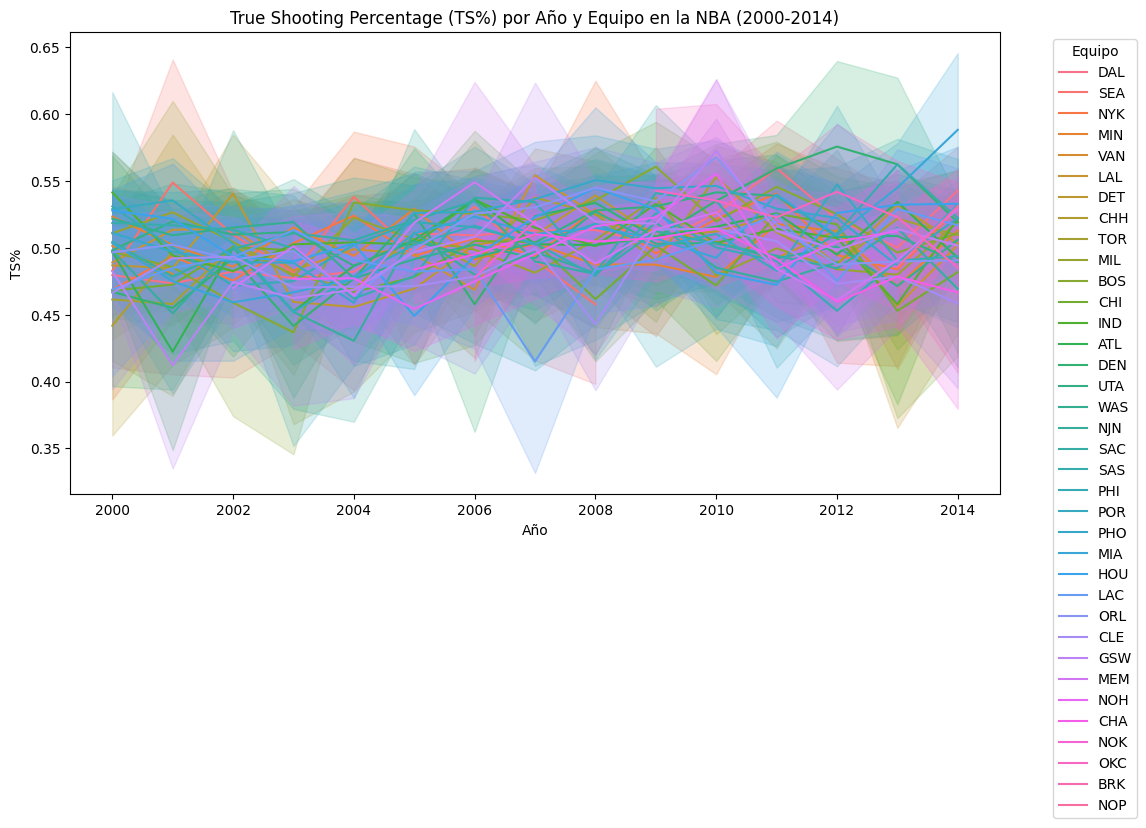

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra el DataFrame
df_subset1 = dfNBA[(dfNBA['Year'] >= 2000) & (dfNBA['Year'] <= 2014)]

plt.figure(figsize=(12, 6))  
sns.lineplot(data=df_subset1, x='Year', y='TS%', hue='Tm')

plt.title('True Shooting Percentage (TS%) por Año y Equipo en la NBA (2000-2014)')
plt.xlabel('Año')
plt.ylabel('TS%')

plt.legend(title='Equipo', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



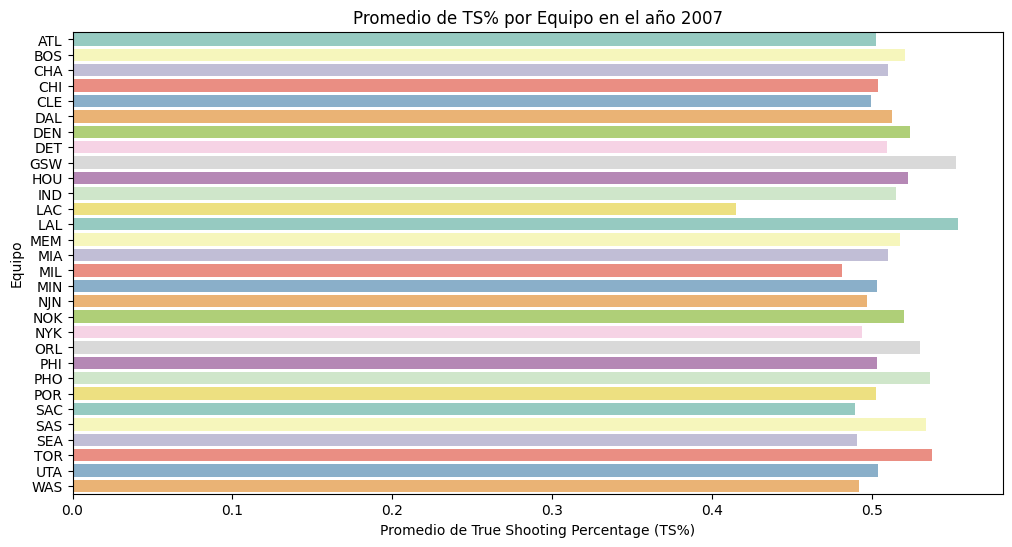

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado dfNBA con tus datos

# Filtra el DataFrame para obtener solo los datos del año 2007
df_2007 = dfNBA[dfNBA['Year'] == 2007]

# Calcula el promedio de TS% por equipo
promedio_ts_por_equipo = df_2007.groupby('Tm')['TS%'].mean().reset_index()

# Crea un gráfico de barras para mostrar el promedio de TS% por equipo
plt.figure(figsize=(12, 6))
sns.barplot(x='TS%', y='Tm', data=promedio_ts_por_equipo, palette='Set3')
plt.xlabel('Promedio de True Shooting Percentage (TS%)')
plt.ylabel('Equipo')
plt.title('Promedio de TS% por Equipo en el año 2007')
plt.show()



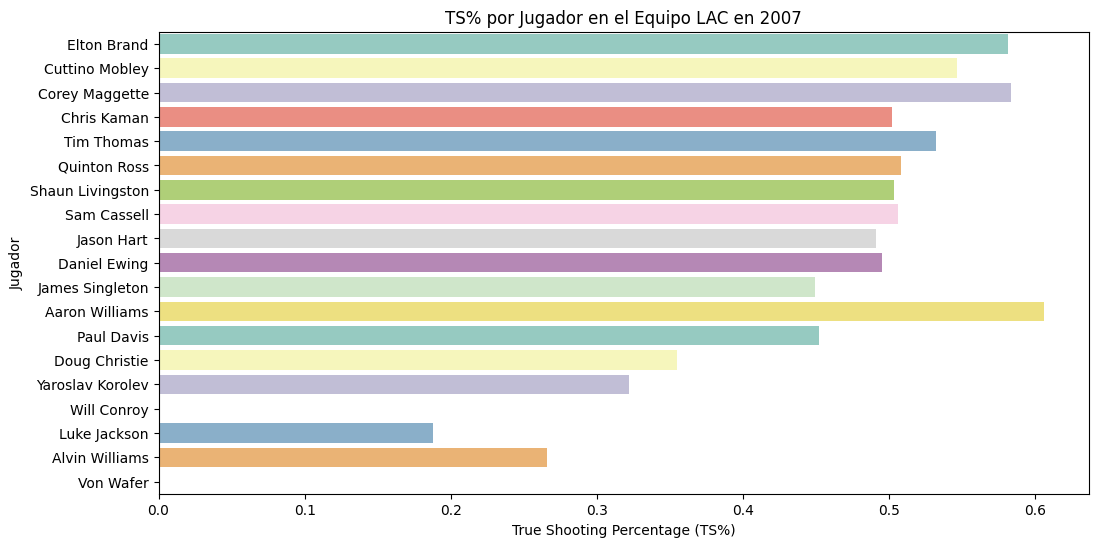

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado dfNBA con tus datos

# Filtra el DataFrame para obtener solo los datos del equipo LAC en el año 2007
df_LAC_2007 = dfNBA[(dfNBA['Tm'] == 'LAC') & (dfNBA['Year'] == 2007)]

# Crea un gráfico de barras para mostrar el TS% por jugador en el equipo LAC en 2007
plt.figure(figsize=(12, 6))
sns.barplot(x='TS%', y='Player', data=df_LAC_2007, palette='Set3')
plt.xlabel('True Shooting Percentage (TS%)')
plt.ylabel('Jugador')
plt.title('TS% por Jugador en el Equipo LAC en 2007')
plt.show()


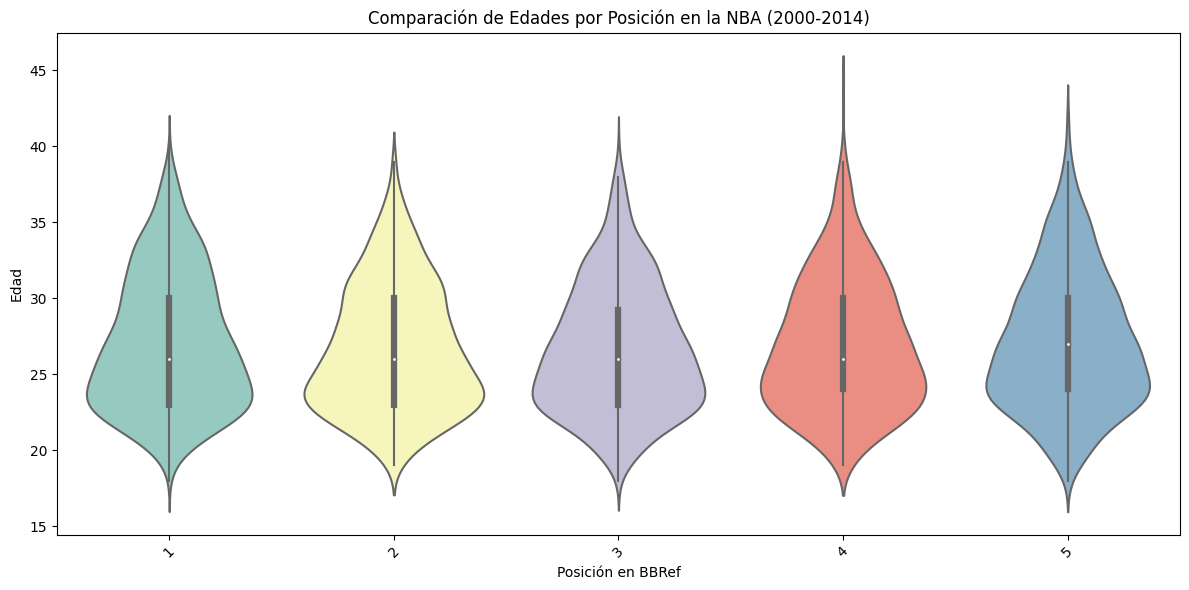

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

df_subset2 = dfNBA[['Year', 'BBRef Pos', 'Age']]
df_subset2 = df_subset2[(df_subset2['Year'] >= 2000) & (df_subset2['Year'] <= 2014)]
posiciones_mostradas = [1, 2, 3, 4, 5]

# Crea un diagrama de violín
plt.figure(figsize=(12, 6))
sns.violinplot(x='BBRef Pos', y='Age', data=df_subset2, palette='Set3', order=posiciones_mostradas)
plt.title('Comparación de Edades por Posición en la NBA (2000-2014)')
plt.xlabel('Posición en BBRef')
plt.ylabel('Edad')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()



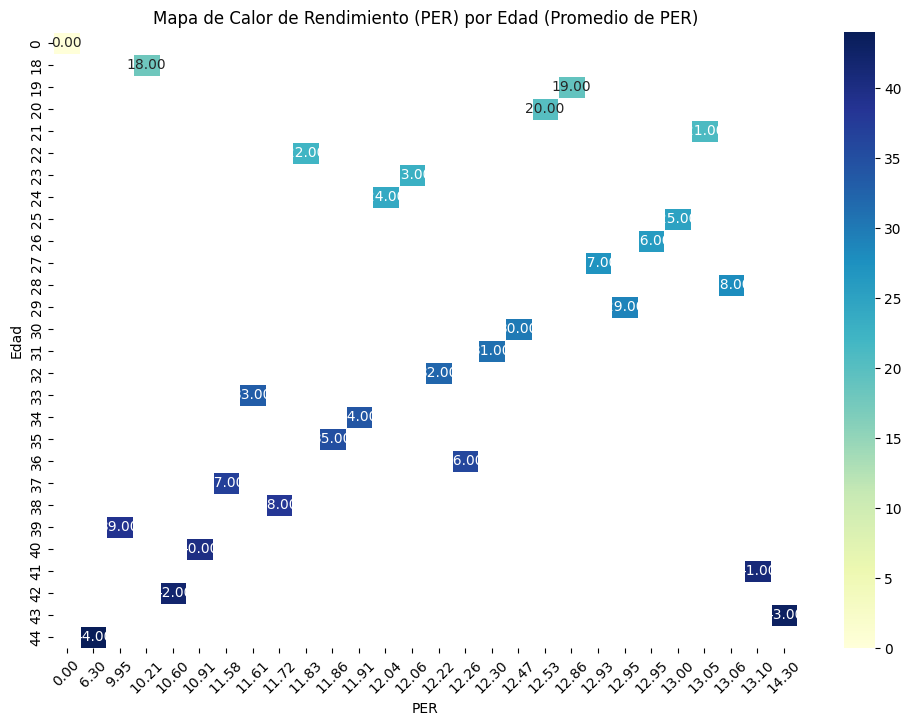

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_subset3 = dfNBA[['Age', 'PER']]
df_age_performance = df_subset3.groupby('Age')['PER'].mean().reset_index()

# Crea una tabla pivot para tener Age en el índice y PER en las columnas
pivot_table = df_age_performance.pivot(index='Age', columns='PER', values='Age')

# Crear el Mapa de Calor
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)

# Personalizar el eje X (PER) para mostrar solo 2 decimales
plt.xticks(rotation=45)
heatmap.set_xticklabels([f'{x:.2f}' for x in pivot_table.columns])

plt.title('Mapa de Calor de Rendimiento (PER) por Edad (Promedio de PER)')
plt.xlabel('PER')
plt.ylabel('Edad')
plt.show()


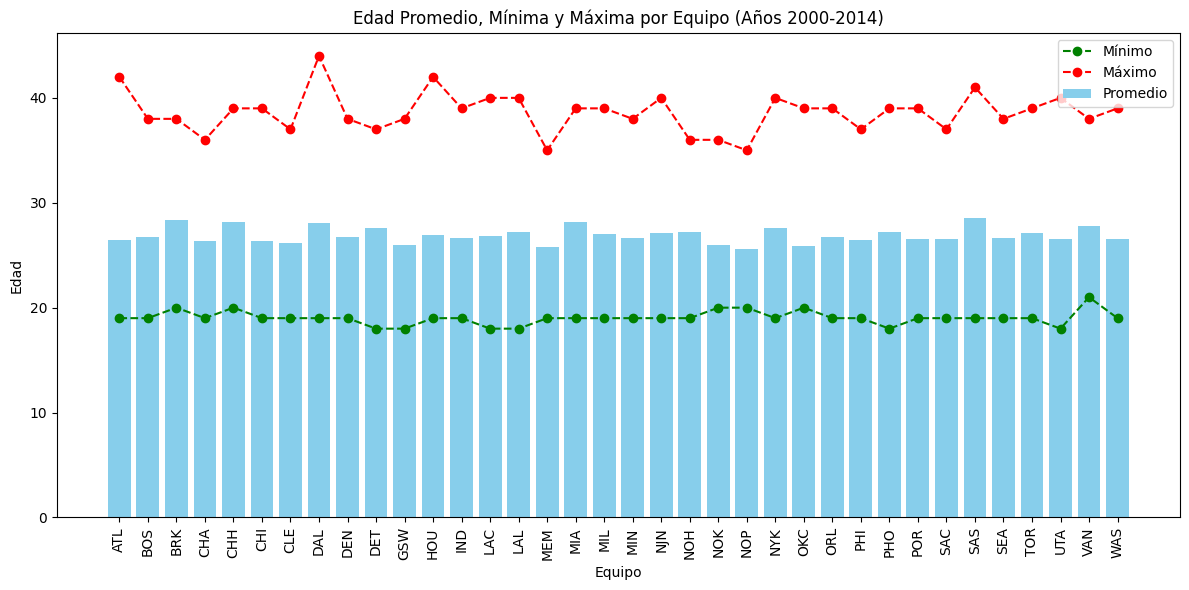

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df_subset4 = dfNBA[(dfNBA['Year'] >= 2000) & (dfNBA['Year'] <= 2014)]

age_stats_by_team = df_subset4.groupby('Tm')['Age'].agg(['mean', 'min', 'max']).reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(age_stats_by_team['Tm'], age_stats_by_team['mean'], color='skyblue', label='Promedio')
plt.plot(age_stats_by_team['Tm'], age_stats_by_team['min'], color='green', linestyle='--', marker='o', label='Mínimo')
plt.plot(age_stats_by_team['Tm'], age_stats_by_team['max'], color='red', linestyle='--', marker='o', label='Máximo')
plt.title('Edad Promedio, Mínima y Máxima por Equipo (Años 2000-2014)')
plt.xlabel('Equipo')
plt.ylabel('Edad')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


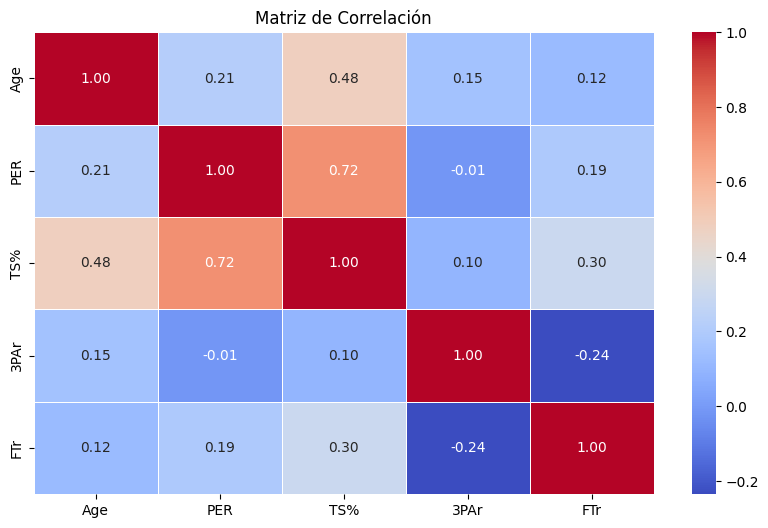

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columnas_interes = ['Age','PER', 'TS%', '3PAr', 'FTr']
df_subset5 = dfNBA[columnas_interes]
matriz_correlacion = df_subset5.corr()

# Crea un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
'''
INTERPRETACIÓN DE GRÁFICOS
1. En este gráfico muestra el porcentaje de True Shooting por equipo en los años 2000 al 2014.
Aquí podemos observar picos claros para algunos equipos que es necesario identificar para poder trabajar en las razones por las cuales 
se presentan.
Por ejemplo, en el año 2007 se ve un pico claro en el TS% así que decidí hacer un análisis más profundo para ese año.

2. En este gráfico identifiqué que el equipo de Los Angeles Clippers (LAC) tiene un claro pico negativo en el promedio de TS% para 
el año 2007.

3. Para identificar las causas del mal desempeño de LAC en el año 2007 hice un gráfico que me mostrara el desempeño por jugador, 
en el cual puedo identificar que uno de los jugadores (Will Conroy) tiene 0% de TS, esto puede ser la causa de mal desempeño del equipo. Se tendría que hacer una investigación más profunda para saber si este dato es un error y se tiene que eliminar, o es real.

4. Este gráfico es un diagrama de violín para hacer la comparación de edades por posición en la NBA (2000-2014). En él, podemos ver que 
la media de edades es casi la misma para todas las posiciones, excepto para la 5 (Pívot) en la cual se observa una media más alta. 
En cuanto a los máximos y mínimos también son muy similares, con la posición 4 (Ala-Pívot) con una máxima un poco más elevada. 

5. En este mapa de calor donde se puede ver el PER por edad podemos observar una clara relación entre el PER y la edad.

6. En este gráfico de barras podemos observar el promedio de edades de cada equipo y los máximos y mínimos por equipos. 
Por ejemplo, el equipo LAC tiene una mínima, máxima y promedio muy similar a la mayoría de los equipos.

7.Aquí podemos una matriz de correlaciones entre distintas variables con el fin de identificar posibles causas de buen o mal desempeño 
de algún equipo en algún año en particular.
Los resultados indican una fuerte relación entre el TS% y el PER y un poco fuerte entre la edad (Age) y el TS%.

'''
